In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [73]:
df = pd.read_csv('habr_jobs.csv')
df = df.rename(columns={'Возможность удаленки': 'Тип занятости'})

# Приводим к строкам на всякий случай
df['Рейтинг компании'] = df['Рейтинг компании'].astype(str)

# Убираем zero-width space и слово "Москва"
df['Рейтинг компании'] = df['Рейтинг компании'].str.replace(r'(\u200b|Москва)', '', regex=True)

# Убираем пробелы
df['Рейтинг компании'] = df['Рейтинг компании'].str.strip()

df['Рейтинг компании'] = pd.to_numeric(df['Рейтинг компании'], errors='coerce')
df['ЗП'] = df['ЗП'].replace({'до 120 000 ₽': 110000, 'до 400 000 ₽': 400000, 'от 480 до 800 $': 48720, "от 80 000 до 120 000 ₽": 100000, 'от 100 000 до 150 000 ₽': 150000, "от 60 000 ₽": 60000})

df.head()

C:\Users\HONOR\AppData\Local\Temp\ipykernel_15916\4006971722.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ЗП'] = df['ЗП'].replace({'до 120 000 ₽': 110000, 'до 400 000 ₽': 400000, 'от 480 до 800 $': 48720, "от 80 000 до 120 000 ₽": 100000, 'от 100 000 до 150 000 ₽': 150000, "от 60 000 ₽": 60000})


,Дата,Вакансия,ЗП,Компания,Рейтинг компании,Необходимый уровень,Место работы,Тип занятости
0,8 июля,Сетевой инженер,NaN,Резонит,NaN,Средний (Middle),Москва,Полный рабочий день
1,8 июля,Техлид в Yandex Network Blockstore (C++),NaN,Яндекс,3.6,Ведущий (Lead),Москва,Можно удаленно
2,8 июля,Эксперт по Информационной Безопасности,NaN,Лаборатория Касперского,4.2,Информационная безопасность,Москва,Москва
3,8 июля,Инженер данных DWH в Вертикали,NaN,Яндекс,3.6,SQL,Москва,Санкт-Петербург
4,8 июля,CIO в торгово-производственный холдинг (СПб),NaN,EvoHiring,NaN,Управление людьми,Санкт-Петербург,Полный рабочий день


Text(0.5, 1.0, 'Деление вакансий по компаниям')

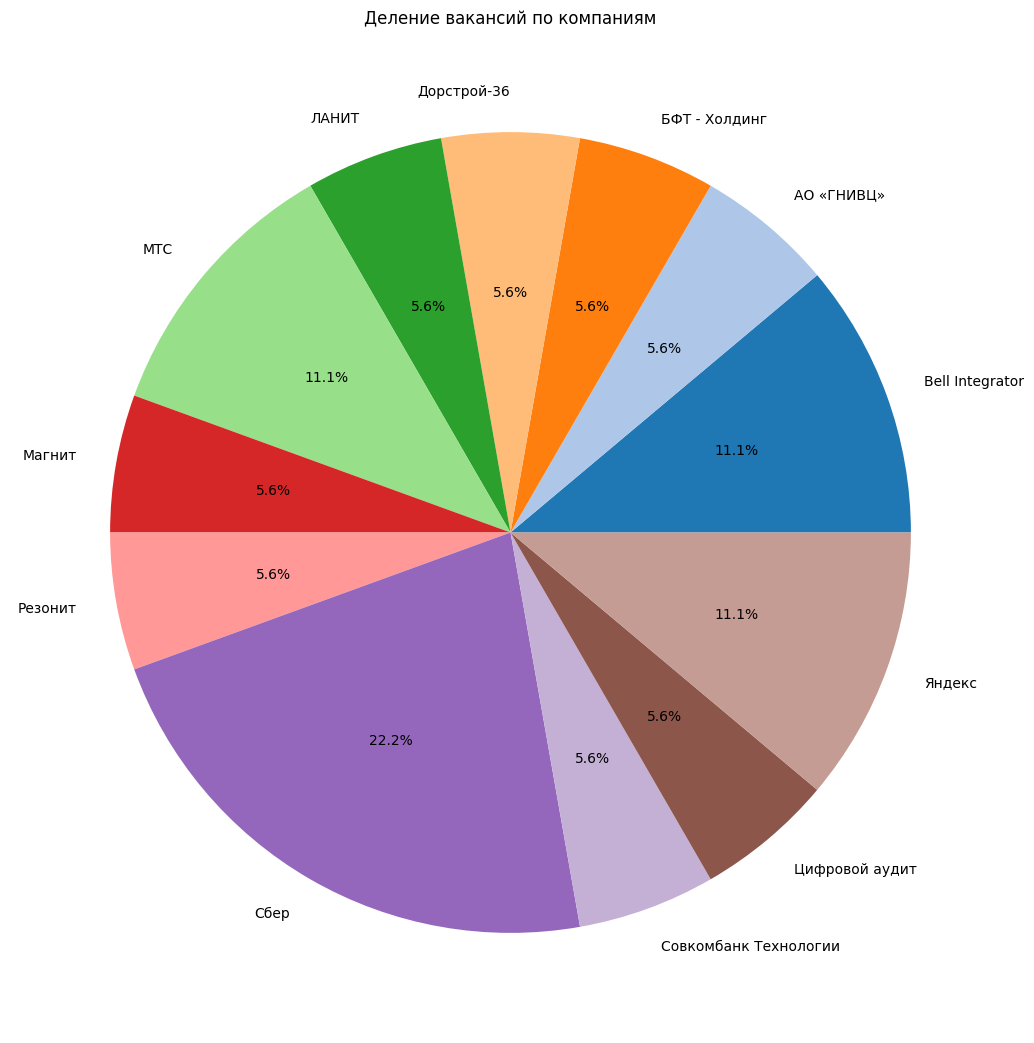

In [79]:
comp = df.groupby('Компания').aggregate({"Компания": 'count'})

labels = comp.index
data = comp['Компания']

colors = colors = plt.cm.tab20.colors 

plt.figure(figsize=(13,13))
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=colors[:len(data)])
plt.title("Деление вакансий по компаниям")


Text(0.5, 1.0, 'Деление вакансий по компаниям')

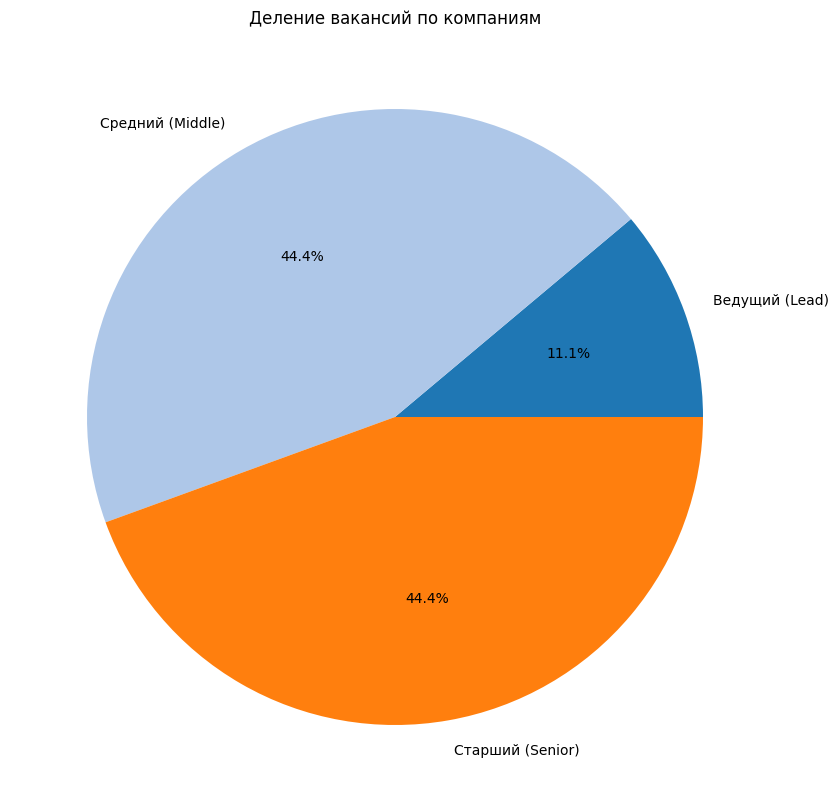

In [ ]:
ind = df[(df['Необходимый уровень'] == 'SQL') | (df['Необходимый уровень'] == 'Информационная безопасность') | (df['Необходимый уровень'] == 'Управление людьми') |
    (df['Необходимый уровень'] == 'Разработка программного обеспечения')].index


df.drop(ind, inplace=True)

comp = df.groupby('Необходимый уровень').aggregate({"Компания": 'count'})


labels = comp.index
data = comp['Компания']

colors = colors = plt.cm.tab20.colors 

plt.figure(figsize=(10,10))
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=colors[:len(data)])
plt.title("Потребность в специалистах")
